In [2]:

from config.config import CONFIG
from generate.generate import generate
import numpy as np
from data.data import LABEL
cfg = CONFIG()
cfg.classifier_guidance = True
cfg.classifier_scale  = 10
# Generate
for y in range(len(LABEL)):
    
    generated_knots = []
    for i in range(100):
        # y = np.random.randint(0, 8) # Randomly select a label bw 1 to 8.
        xt = generate(cfg, y)
        generated_knots.append(xt)
    generated_knots = np.array(generated_knots).squeeze(axis=1)
    np.save(f'/home/zzhang/KnotFormer/Guided_Diff_L80/gene_data/T1000/ep64_diff_loss_0_1310/gene_gd{cfg.classifier_scale}_{LABEL[y]}.npy', generated_knots)
    

1000it [00:32, 30.62it/s]
1000it [00:32, 30.59it/s]
1000it [00:31, 31.42it/s]
1000it [00:33, 30.03it/s]
1000it [00:34, 28.72it/s]
1000it [00:34, 29.17it/s]
1000it [00:34, 28.98it/s]
1000it [00:34, 28.76it/s]
1000it [00:34, 29.13it/s]
1000it [00:34, 28.72it/s]
1000it [00:34, 28.83it/s]
1000it [00:34, 28.68it/s]
1000it [00:34, 29.30it/s]
1000it [00:34, 29.38it/s]
1000it [00:34, 28.88it/s]
1000it [00:35, 27.83it/s]
1000it [00:34, 28.95it/s]
1000it [00:33, 29.42it/s]
1000it [00:33, 29.46it/s]
1000it [00:34, 28.86it/s]
1000it [00:41, 23.96it/s]
1000it [00:41, 24.06it/s]
1000it [00:41, 24.22it/s]
1000it [00:41, 23.91it/s]
1000it [00:42, 23.80it/s]
1000it [00:41, 24.05it/s]
1000it [00:41, 24.20it/s]
1000it [00:41, 24.09it/s]
1000it [00:41, 23.92it/s]
1000it [00:41, 23.97it/s]
1000it [00:41, 24.23it/s]
1000it [00:41, 23.89it/s]
1000it [00:41, 24.00it/s]
1000it [00:41, 23.93it/s]
1000it [00:41, 24.06it/s]
1000it [00:42, 23.72it/s]
1000it [00:41, 23.96it/s]
1000it [00:41, 24.36it/s]
1000it [00:4

In [26]:
from gaussian.gaussian import GuidedDiffusionProcess
from config.config import CONFIG as cfg


diffusion_process = GuidedDiffusionProcess(
    num_timesteps=1000, #cfg.num_diffusion_timesteps, 
    num_sampling_timesteps=1000,#cfg.num_sampling_timesteps,
    classifier_guidance = cfg.classifier_guidance,
    classifier_scale = cfg.classifier_scale
)
import torch
import numpy as np
device = 'cpu'
test_knots = torch.from_numpy(np.load('/home/zzhang/LP_knot_id/L80/traj_knot62_L80_close.npy')[:3]).to(device)
noise = torch.randn_like(test_knots).to(device)
t = torch.tensor([10,500,999]).to(device)
diffused_knots = diffusion_process.add_noise(test_knots, noise,t)


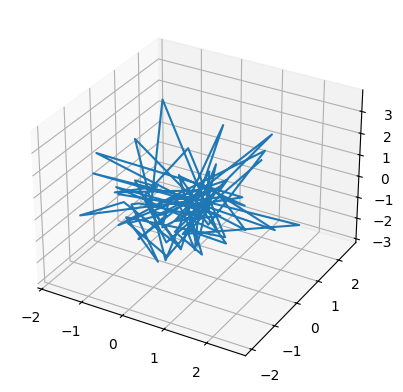

In [28]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
knots = diffused_knots.cpu().detach().numpy()
# Assuming generated_knots is a list of 3D coordinates
knots = np.array(knots)
knot = diffused_knots[2]
ax.plot(knot[:, 0], knot[:, 1], knot[:, 2])

plt.show()

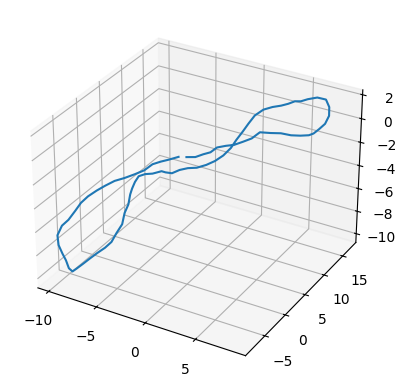

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Assuming generated_knots is a list of 3D coordinates
generated_knots = np.array(generated_knots)
knot = generated_knots[4]
ax.plot(knot[:, 0], knot[:, 1], knot[:, 2])

plt.show()

In [9]:
np.linalg.norm(np.roll(knot,shift = 1, axis=0)-knot,axis = 1)

array([0.9621476 , 1.018577  , 0.9747259 , 0.99781495, 0.9517507 ,
       0.991383  , 1.0046327 , 0.9609346 , 0.9857161 , 0.9426967 ,
       0.99566025, 0.97181803, 0.9530803 , 1.0306754 , 0.9052775 ,
       0.9812347 , 1.0061774 , 0.9935047 , 0.93680567, 0.9723429 ,
       0.97888905, 0.97387844, 0.9591567 , 0.9479503 , 0.9911509 ,
       0.98248386, 0.99021673, 0.9955321 , 0.9603162 , 0.9794459 ,
       0.9804996 , 1.0065364 , 1.0093766 , 0.9582218 , 0.96608955,
       0.96508455, 0.9798363 , 1.0113795 , 0.96340513, 0.9898604 ,
       0.9932235 , 0.9891597 , 0.992746  , 0.98385787, 0.95239353,
       0.9736728 , 1.0297512 , 0.960424  , 0.97384846, 0.93251234,
       0.9512541 , 1.0146073 , 0.98600763, 0.95527047, 0.984571  ,
       1.0384607 , 0.9982436 , 0.9179375 , 1.0356836 , 0.9670166 ,
       0.96366584, 0.9591995 , 0.93630856, 0.96799076, 0.9585904 ,
       0.9719255 , 0.966395  , 0.9282065 , 0.933225  , 0.9352652 ,
       0.9784486 , 0.94324267, 0.9746387 , 0.9606891 , 0.94150

In [13]:
generated_knots.shape

(100, 80, 3)

In [14]:
import pythonknot.alexander_poly as ap
generated_knots = np.array(generated_knots)
ap.calculate_knot_size(generated_knots, "ring")

(['1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1',
  '1'],
 [[78, 78, 1],
  [78, 78, 1],
  [78, 78, 1],
  [78, 78, 1],
  [78, 78, 1],
  [78, 78, 1],
  [78, 78, 1],
  [78, 78, 1],
  [78, 78, 1],
  [78, 78, 1],
  [78, 78, 1],
  [78, 78, 1],
  [78, 78, 1],
  [78, 78, 1],
  [78, 78, 1],
  [78, 78, 1],
  [78, 78, 1],
  [78, 78, 1],
  [78, 78, 1],
  [78, 78, 1],

In [15]:
cond_labels

[7, 3]